In [238]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

# О датасете

В данном датасете собраны данные страховой компании. Датасет состоит из 19 признаков, последий из которых обозначает получал ли клиент выплату по страховке или нет

ID	- уникальный номер клиента 
AGE	- возраст, в нескольких диапазонах

GENDER	- пол

RACE	- раса 

DRIVING_EXPERIENCE	- опыт вождения, в нескольких диапазонах

EDUCATION	- образование

INCOME	- уровень дохода

CREDIT_SCORE	- кредитный рейтинг

VEHICLE_OWNERSHIP	- обладает ли клиент личным автомобилем или нет

VEHICLE_YEAR	- год производства машины, старше машина 2015 года, или нет

MARRIED	- находится ли клиент в браке или нет

CHILDREN	- есть ли у клиента дети

POSTAL_CODE	- почтовый индекс

ANNUAL_MILEAGE	- пробег автомобиля

VEHICLE_TYPE	- тип машины, спорт класс или нет

SPEEDING_VIOLATIONS	- число нарушений скорости

DUIS	- сколько раз клиент был за рулем в нетрезвом виде

PAST_ACCIDENTS - количество ДТП в прошлом	

OUTCOME - получил ли клиент выплату от страховой или нет



In [239]:
data = pd.read_csv('./Car_Insurance_Claim.csv')
data.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


Исходя из типов данных определим их в соотвествующие категории

In [240]:
num_cols= [
    'CREDIT_SCORE',
    'POSTAL_CODE',
    'ANNUAL_MILEAGE',
    'SPEEDING_VIOLATIONS',
    'DUIS',
    'PAST_ACCIDENTS',
    'AGE',
]
cat_cols=[
    
    'GENDER',
    'RACE',
    'MARRIED',
    'CHILDREN',
    'DRIVING_EXPERIENCE',
    'EDUCATION',
    'INCOME',
    'VEHICLE_OWNERSHIP',
    'VEHICLE_YEAR',
    'VEHICLE_TYPE',
]
target_col = 'OUTCOME'

cols=num_cols + cat_cols + [target_col]

Проверим датасет на отсутствующие значения

In [241]:
for col in data.columns:
    print(f"{data[col].isna().sum()} values are missing in the column '{col}'")

0 values are missing in the column 'ID'
0 values are missing in the column 'AGE'
0 values are missing in the column 'GENDER'
0 values are missing in the column 'RACE'
0 values are missing in the column 'DRIVING_EXPERIENCE'
0 values are missing in the column 'EDUCATION'
0 values are missing in the column 'INCOME'
982 values are missing in the column 'CREDIT_SCORE'
0 values are missing in the column 'VEHICLE_OWNERSHIP'
0 values are missing in the column 'VEHICLE_YEAR'
0 values are missing in the column 'MARRIED'
0 values are missing in the column 'CHILDREN'
0 values are missing in the column 'POSTAL_CODE'
957 values are missing in the column 'ANNUAL_MILEAGE'
0 values are missing in the column 'VEHICLE_TYPE'
0 values are missing in the column 'SPEEDING_VIOLATIONS'
0 values are missing in the column 'DUIS'
0 values are missing in the column 'PAST_ACCIDENTS'
0 values are missing in the column 'OUTCOME'


Восстановим пропущенные значения с помощью полиномиальной интерполяции

In [242]:
data['CREDIT_SCORE']=data['CREDIT_SCORE'].interpolate(method='polynomial', order=2)
data['ANNUAL_MILEAGE']=data['ANNUAL_MILEAGE'].interpolate(method='polynomial', order=2)



In [243]:

print(data['OUTCOME'].value_counts())


0.0    6867
1.0    3133
Name: OUTCOME, dtype: int64


Как видим, данные несбалансированы. Это может повлиять на результаты обучения

Далее необходимо преобразовать данные, в частности

Оставить от значении возраста только первое число, т.к. знаки "+" и "-" не могут быть интерпретированы

Если раса клиента относится большинству, то присвоим значение True, иначе False

Опыт вождения разделим на 4 числа: 0-9 лет соответсвует 0; 10-19 числу 1; 20-29 числу 2; больше 30 - числу 3

Образование на 3 типа: без образования - 0; высшая школа - 1; университет - 2

Уровень достатка: бедность - 0; рабочий класс - 1; средний класс - 2; высший класс - 3

Дата производства автомобиля: старше 2015 -  False ; младше 2015 - True

Класс автомобиля: если спортивный автомобиль, то True, иначе False

Владение автомобилем: если клиент владеет личным автомобилем, то True

Находится ли клиент в браке, True, если находится

Есть ли у клиента дети, True, если есть

Результат: если клиент получил выплату, то True



In [244]:
data['AGE'] = data['AGE'].str.slice(0, 2).astype(int)
data['GENDER'] = data['GENDER'].map({'male': True, 'female': False}).astype(bool)
data['RACE'] = data['RACE'].map({'majority': True, 'minority': False}).astype(bool)
data['DRIVING_EXPERIENCE'] = data['DRIVING_EXPERIENCE'].map({'0-9y': 0, '10-19y': 1,'20-29y' : 2, '30y+': 3}).astype(int)
data['EDUCATION'] = data['EDUCATION'].map({'none': 0, 'high school': 1,'university' : 2}).astype(int)
data['INCOME'] = data['INCOME'].map({'poverty': 0, 'working class': 1,'middle class' : 2, 'upper class':3 }).astype(int)
data['VEHICLE_YEAR'] = data['VEHICLE_YEAR'].map({'before 2015': False, 'after 2015': True}).astype(bool)
data['VEHICLE_TYPE'] = data['VEHICLE_TYPE'].map({'sedan': False, 'sports car': True}).astype(bool)
data['VEHICLE_OWNERSHIP'] = data['VEHICLE_OWNERSHIP'].map({1.0: True, 0.0: False}).astype(bool)
data['MARRIED'] = data['MARRIED'].map({1.0: True, 0.0: False}).astype(bool)
data['CHILDREN'] = data['CHILDREN'].map({1.0: True, 0.0: False}).astype(bool)
data['OUTCOME'] = data['OUTCOME'].map({1.0: True, 0.0: False}).astype(bool)
data.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65,False,True,0,1,3,0.629027,True,True,False,True,10238,12000.0,False,0,0,0,False
1,750365,16,True,True,0,0,0,0.357757,False,False,False,False,10238,16000.0,False,0,0,0,True
2,199901,16,False,True,0,1,1,0.493146,True,False,False,False,10238,11000.0,False,0,0,0,False
3,478866,16,True,True,0,2,1,0.206013,True,False,False,True,32765,11000.0,False,0,0,0,False
4,731664,26,True,True,1,0,1,0.388366,True,False,False,False,32765,12000.0,False,2,0,1,True


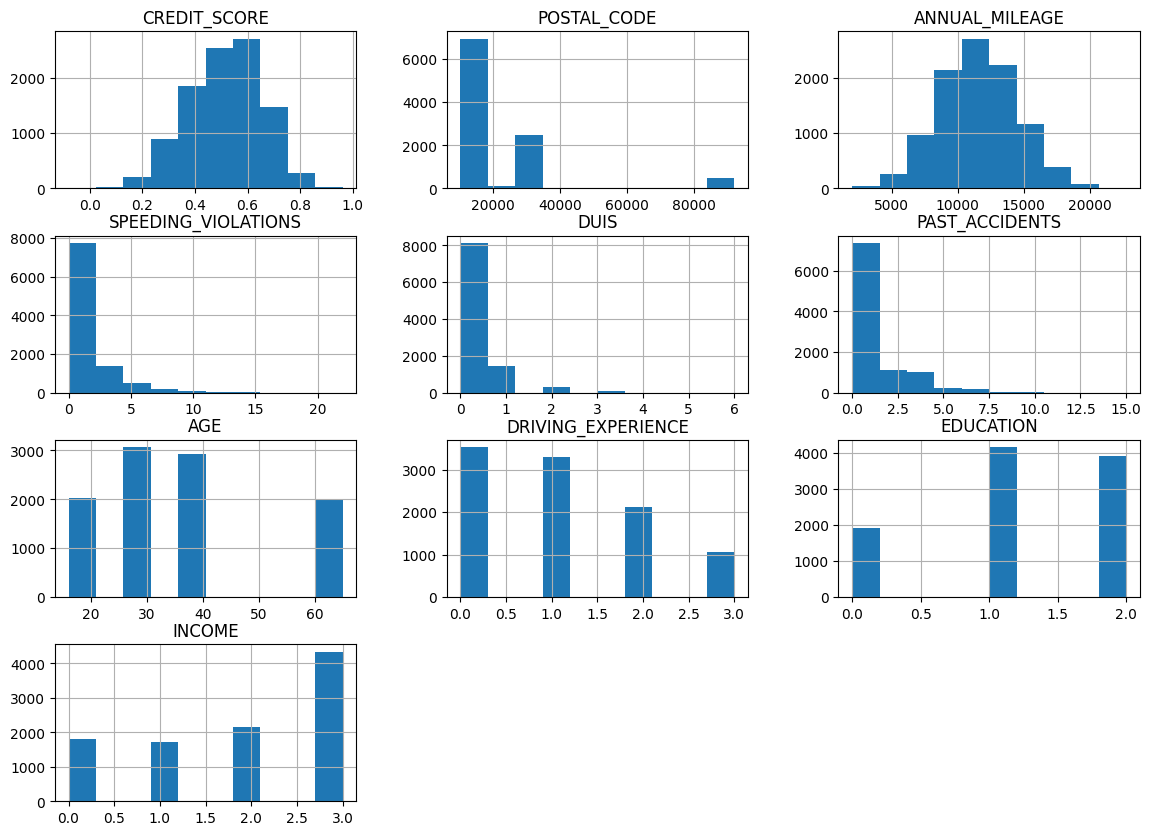

In [245]:
data.hist(column=num_cols+cat_cols+[target_col],figsize=(14,10))
None

Колонка с уникальным номером клиента в обучении никак не поможет, поэтому ее можно убрать

In [246]:
data=data.drop(labels='ID',axis=1)

Построим гистограммы по данным и проверим наличие выбросов

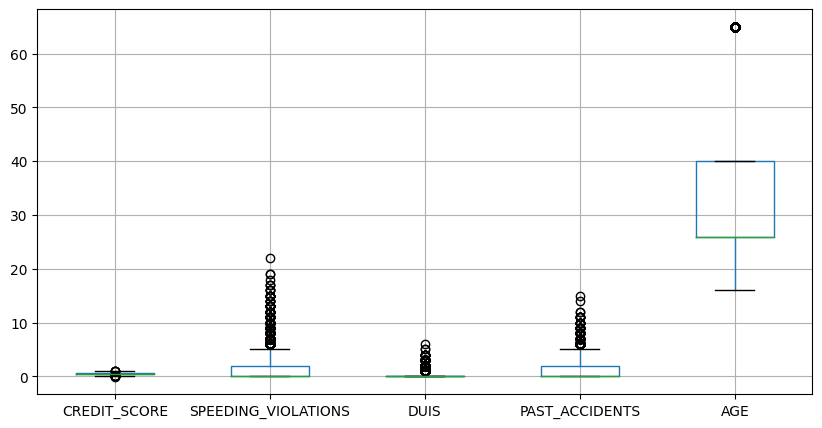

In [247]:

data.boxplot([    'CREDIT_SCORE',
    'SPEEDING_VIOLATIONS',
    'DUIS',
    'PAST_ACCIDENTS',
    'AGE'],figsize=(10,5))
None

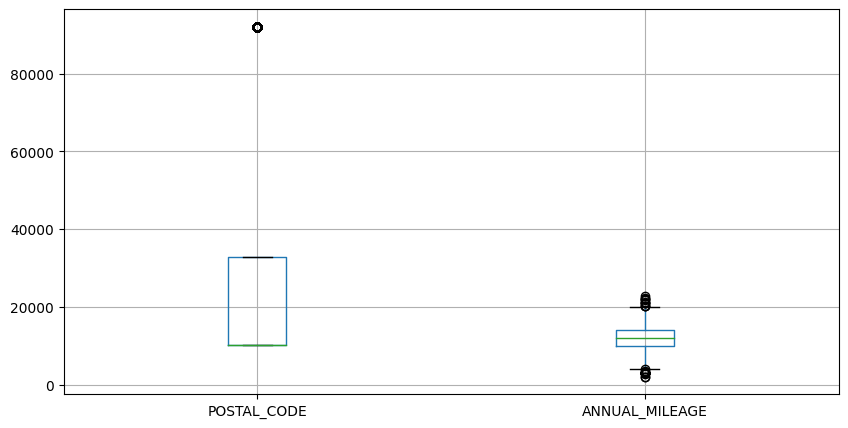

In [248]:
data.boxplot([
    'POSTAL_CODE',
    'ANNUAL_MILEAGE'],figsize=(10,5))
None

Как видим, в основном люди не нарушают правила дорожного движения и не бывали в авариях. В среднем пробег у людей находится в районе 10000 миль в год, но есть те, кто ездят совсем мало, и те, кто проезжает более 20000 миль в год

Построим на корреляцию различных признаков

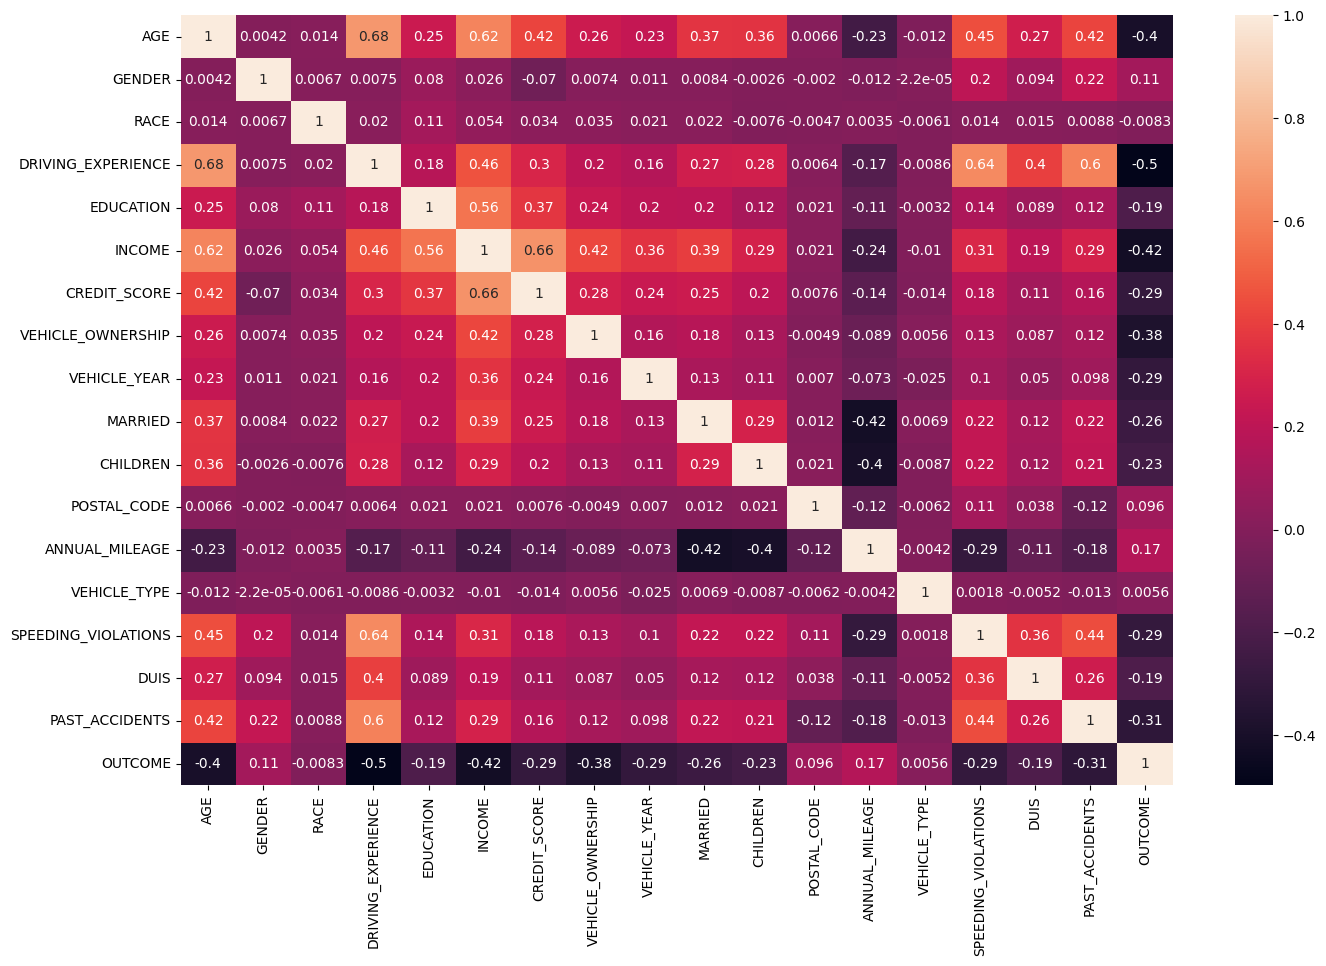

In [249]:

plt.figure(figsize = (16,10))
sns.heatmap(data.corr(),annot=True)
None

К моему удивлению, почти все входные данные коррелируют с результатом выплаты. Люди с большим водительским стажем и большим опытом попадают в аварии реже. Люди обладающие собственным автомобилем им дорожат и попадают в аварии реже. Женатые люди и люди с детьми так же реже обращаются за стразовкой. 

Люди, нарушающие правила дорожного движения и попадавшие в аварии в прошлом имеют меньшие шансы получить выплат по страховке.

Чем больше человек проезжает в год на машине, тем выше шанс того, что он обратится в страховую. Так же мужчины немного чаще обращаются за выплатой и немного чаще нарушают скоростной режим.

Такие признаки как раса, почтовый индекс и класс автомобиля почти не влияют на шанс получения выплаты.

Другие интересные закономерности, такие как: чем старше человек, чем больше водительский стаж, тем вероятнее что он попадал в ДТП. Старшие люди могут больше иметь нарушений скорости в прошлом.


Перейдем к обучению модели

In [250]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

pca = StandardScaler()
X = pca.fit_transform(data[num_cols + cat_cols])

X_train, X_test, y_train, y_test = train_test_split(X, data[target_col], test_size=0.3)



In [251]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import  r2_score, mean_squared_error, roc_auc_score, log_loss, classification_report

def print_metrics(y_preds, y):
    print(f'R^2: {r2_score(y_preds, y)}')
    print(f'MSE: {mean_squared_error(y_preds, y)}')
    print(f'log_loss: {log_loss(y_preds, y)}')
    print(f'roc_auc_score: {roc_auc_score(y_preds, y)}')

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

print_metrics(rfc.predict(X_test), y_test)



R^2: 0.17076387664622938
MSE: 0.16933333333333334
log_loss: 6.1033919738905045
roc_auc_score: 0.8063146004322476


In [252]:

knc = KNeighborsClassifier()
knc.fit(X_train, y_train)

print_metrics(knc.predict(X_test), y_test)

R^2: 0.07808003582317558
MSE: 0.18666666666666668
log_loss: 6.728148632635201
roc_auc_score: 0.7856700711853916


In [253]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

print_metrics(gbc.predict(X_test), y_test)

R^2: 0.29447751087877805
MSE: 0.149
log_loss: 5.370504354978456
roc_auc_score: 0.8278169997774527


Вывод: получились хорошие результаты обучения изза большого числа корелляции в данных. Подбора гиперпараметров у меня нет потому что я не имею пока достаточных знаний) Надеюсь наверстать за время курса